# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import time
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

# User Inputs

* **ID** = TIC ID of selected target  
* **sectors** = Observational sector of TESS  


* **period** = Orbital Period  
* **tdepth** = Transit Depth  


* **lc** = Light curve file  
* **contrastcurve_file** = Contrast curve file  


* **band** = Band of filter through which CC file was created. (TESS, Vis, J, H, K)  
From table below we can identify which band to choose.  

|   Wavelength   | Central Wavelength | Filter |
|:--------------:|:------------------:|:------:|
|  600 - 1000 nm | 786.5 nm           |  TESS  |
|   400 - 800 nm | 550 nm             |   Vis  |
| 1000 - 1500 nm | 1250 nm            |   J    |
| 1400 - 2000 nm | 1650 nm            |   H    |
| 1800 - 2600 nm | 2200 nm            |   K    |

* We usually encounter with following wavelengths,  
 - **562 nm** : Vis filter  
 - **832 nm** : TESS filter  
 - **Br-Gamma** (2172 - 2202 nm) : K filter
 - **Jcont** (1190 - 1230 nm) : J filter

# I/P

* *Use these values for input*  

  - **Sector 34:**  
Period = 5.9444510101  
tdepth = 0.0473339108**2
   
  - **Sector 44:**  
Period = 5.9444388502  
tdepth = 0.0478393977**2

  - **Sector 45:**  
Period = 5.9444381136  
tdepth = 0.0534977751**2
   
  - **Sector 46:**  
Period = 5.9444780413  
tdepth = 0.0509770129**2

In [9]:
ID = 19025965
sectors = np.array([45])

period = 3.9941170573
tdepth = 0.0698681026**2

lc = pd.read_csv("TOI_493_45.csv", header=None)
contrastcurve_file = "Palomar_5m_K.csv"

band = 'K'

# Downloading & Visualizing Data

In [3]:
target = tr.target(ID=ID, sectors=sectors)

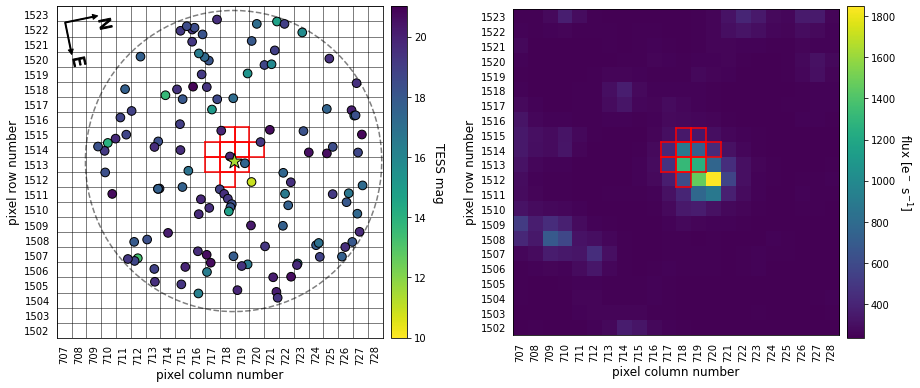

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,19025965,11.4479,10.364,9.767,9.626,119.627938,12.883456,0.648000,0.811865,4138.96,9.286230,0.000,0.000
1,760505000,19.7358,NaN,NaN,NaN,119.625900,12.882429,NaN,NaN,NaN,1.134670,8.050,242.670
2,19025964,17.5070,16.275,15.877,15.785,119.629702,12.887524,NaN,NaN,4416.00,0.948222,15.902,22.916
3,19025962,10.9143,10.256,9.933,9.868,119.637450,12.888673,0.960000,2.128780,5483.95,2.436870,38.303,60.633
4,760504894,18.8653,NaN,NaN,NaN,119.637725,12.876286,NaN,NaN,NaN,0.051725,42.965,126.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,19025944,15.7507,15.231,14.841,14.742,119.583830,12.918257,1.040000,1.115330,5802.00,0.410522,199.130,308.993
116,19025948,14.7251,14.107,13.769,13.757,119.577613,12.909587,1.040000,0.861574,5781.00,0.927352,200.094,298.050
117,760505023,19.7280,NaN,NaN,NaN,119.665240,12.925509,NaN,NaN,3871.00,0.961259,200.133,40.843
118,760505034,18.9024,NaN,NaN,NaN,119.579123,12.912220,NaN,NaN,NaN,-0.749487,200.164,301.159


In [4]:
ap = np.array([[718, 1512],
[717, 1513],
[718, 1513],
[719, 1513],
[717, 1514],
[718, 1514],
[719, 1514],
[720, 1514],
[718, 1515],
[719, 1515]])

target.plot_field(sector = sectors[0], ap_pixels = ap)
 
target.stars

# Check Nearby Region

In [5]:
apertures = np.array([ap])
target.calc_depths(tdepth = tdepth, all_ap_pixels = apertures)

target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,19025965,11.4479,10.364,9.767,9.626,119.627938,12.883456,0.648000,0.811865,4138.96,9.286230,0.000,0.000,8.145873e-01,0.005993
1,760505000,19.7358,NaN,NaN,NaN,119.625900,12.882429,NaN,NaN,NaN,1.134670,8.050,242.670,4.189037e-04,0.000000
2,19025964,17.5070,16.275,15.877,15.785,119.629702,12.887524,NaN,NaN,4416.00,0.948222,15.902,22.916,2.251429e-03,0.000000
3,19025962,10.9143,10.256,9.933,9.868,119.637450,12.888673,0.960000,2.128780,5483.95,2.436870,38.303,60.633,1.806834e-01,0.027017
4,760504894,18.8653,NaN,NaN,NaN,119.637725,12.876286,NaN,NaN,NaN,0.051725,42.965,126.923,2.121256e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,19025944,15.7507,15.231,14.841,14.742,119.583830,12.918257,1.040000,1.115330,5802.00,0.410522,199.130,308.993,5.526444e-25,0.000000
116,19025948,14.7251,14.107,13.769,13.757,119.577613,12.909587,1.040000,0.861574,5781.00,0.927352,200.094,298.050,1.641660e-24,0.000000
117,760505023,19.7280,NaN,NaN,NaN,119.665240,12.925509,NaN,NaN,3871.00,0.961259,200.133,40.843,3.774738e-32,0.000000
118,760505034,18.9024,NaN,NaN,NaN,119.579123,12.912220,NaN,NaN,NaN,-0.749487,200.164,301.159,3.037591e-26,0.000000


In [7]:
for i in range (1, np.size(target.stars['ID'])):
    if target.stars['tdepth'][i] !=0:
        print(target.stars['ID'][i])

19025962


# Ploting CC File

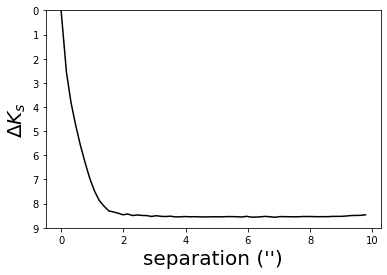

In [6]:
cc = pd.read_csv(contrastcurve_file, header=None)
sep, dmag = cc[0].values, cc[1].values

plt.plot(sep, dmag, 'k-');
plt.ylim(9,0);
plt.ylabel("$\\Delta K_s$", fontsize=20);
plt.xlabel("separation ('')", fontsize=20);

# Calculating FPP & NFPP

In [10]:
%%time
# read in the light curve
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

#lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err)#.bin(time_bin_size=lc_binsize)

target.calc_probs(time = lc.time.value, 
                  flux_0 = lc.flux.value, 
                  flux_err_0 = np.mean(lc.flux_err.value), 
                  P_orb = P_orb,
                  contrast_curve_file = contrastcurve_file,
                  filt = band,
                  exptime = 0.0013888888888889)

Calculating TP scenario probabilitiey for 19025965.
Calculating EB and EBx2P scenario probabilities for 19025965.
Calculating PTP scenario probability for 19025965.
Calculating PEB and PEBx2P scenario probabilities for 19025965.
Calculating STP scenario probability for 19025965.
Calculating SEB and SEBx2P scenario probabilities for 19025965.
Calculating DTP scenario probability for 19025965.
Calculating DEB and DEBx2P scenario probabilities for 19025965.
Calculating BTP scenario probability for 19025965.
Calculating BEB and BEBx2P scenario probabilities for 19025965.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 19025962.
Wall time: 29min 27s


In [11]:
df_results = target.probs
print("FPP = ", target.FPP)
print("NFPP = ", target.NFPP)
df_results

FPP =  0.037239509759223854
NFPP =  0.036112966493605896


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,19025965,TP,0.648000,0.811865,3.994117,86.640089,0.452392,0.317386,96.259400,5.072430,0.000000,0.000000,8.364653e-01
1,19025965,EB,0.648000,0.811865,3.994117,80.470151,1.553836,0.369343,52.333350,0.000000,0.599017,0.595689,1.259925e-30
2,19025965,EBx2P,0.648000,0.811865,7.988234,86.950781,0.691594,0.556012,158.924151,0.000000,0.647802,0.670761,4.266574e-06
3,19025965,PTP,0.648000,0.811865,3.994117,88.359295,0.236113,0.299792,55.210128,5.258563,0.000000,0.000000,4.233005e-02
4,19025965,PEB,0.648000,0.811865,3.994117,85.991333,0.495675,0.488509,145.059923,0.000000,0.113997,0.139214,4.284309e-22
5,19025965,PEBx2P,0.648000,0.811865,7.988234,86.989588,0.793954,0.493934,165.050992,0.000000,0.641283,0.662801,2.248799e-07
6,19025965,STP,0.579923,0.584946,3.994117,89.300218,0.131467,0.300729,113.324088,5.873977,0.000000,0.000000,5.665778e-04
7,19025965,SEB,0.174223,0.205989,3.994117,89.126332,0.269026,0.757779,195.628332,0.000000,0.089483,0.104319,1.830136e-07
8,19025965,SEBx2P,0.252651,0.277002,7.988234,88.620162,0.646621,0.777182,202.075985,0.000000,0.241745,0.267417,3.028358e-07
9,19025965,DTP,0.648000,0.811865,3.994117,89.318167,0.135263,0.246105,344.259073,4.723972,0.000000,0.000000,8.396511e-02


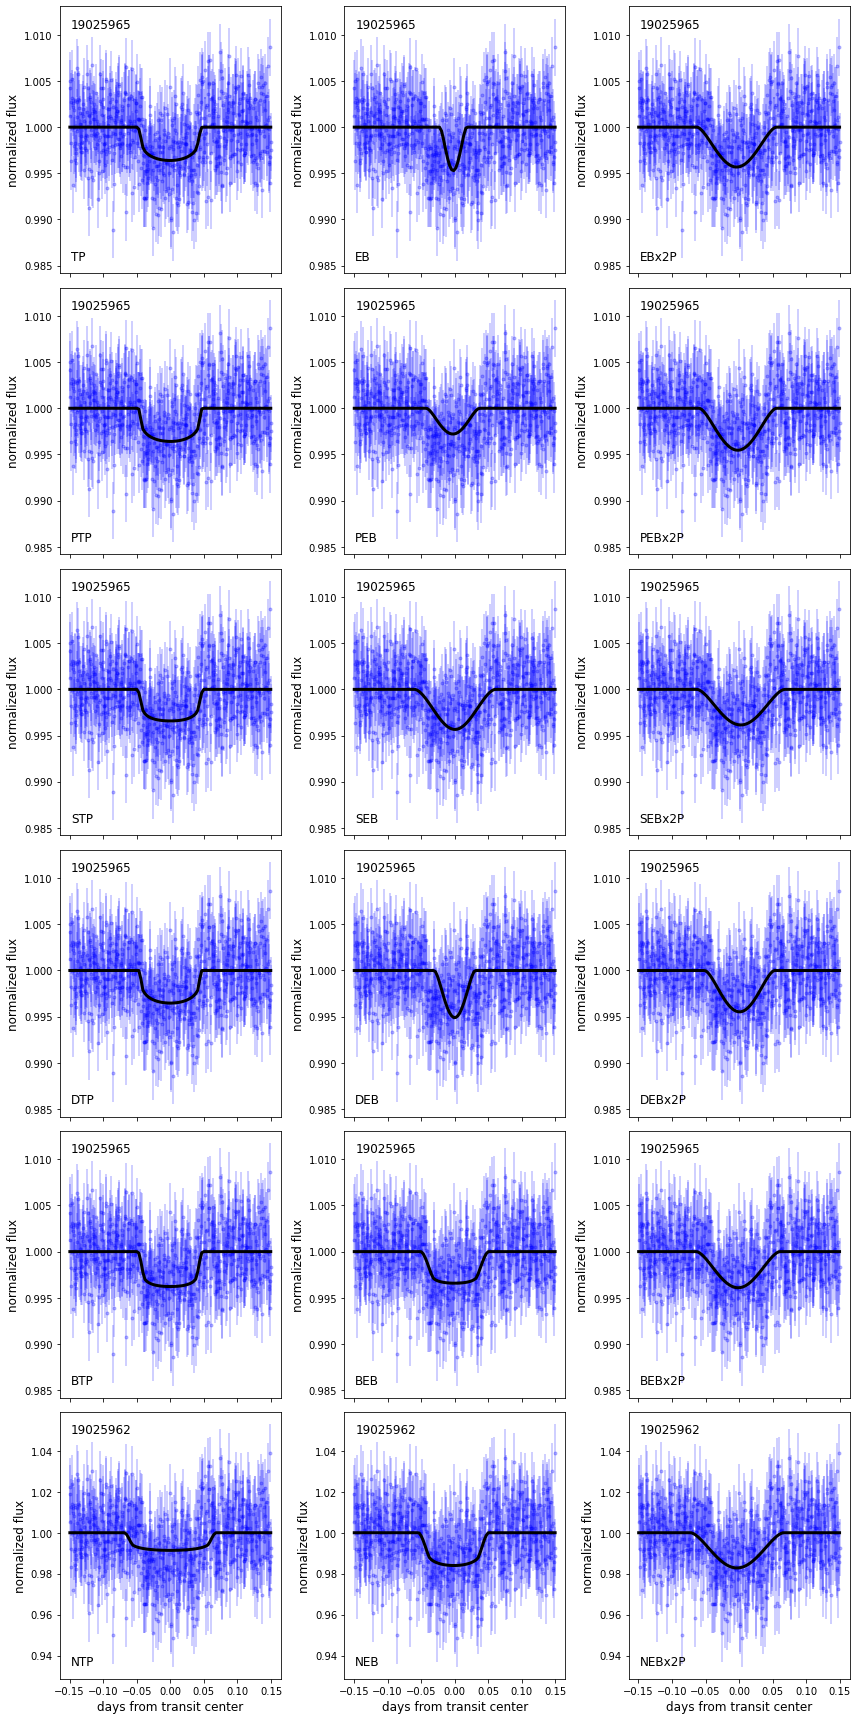

In [12]:
target.plot_fits(time=time, flux_0=flux, flux_err_0=np.mean(flux_err))